<center> <h2 style="background-color: DodgerBlue; padding: 10px;"> <span style="color:white">
<br> BCS32: BROWN, Yuri M. <br>
<br> NATURAL LANGUAGE PROCESSING <br>
<br> ACTIVITY: MINI ACTIVITY 3 <br> <br>
</span> </h2> </center>

<h1> <b> UTTERANCES </b> </h1>

# Import libraries

In [1]:
# Import libraries
import nltk
import re
nltk.download('punkt')

# For preprocessing
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

# For vectorzation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# For data visualization
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

[nltk_data] Downloading package punkt to C:\Users\sheila
[nltk_data]     brown\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\sheila
[nltk_data]     brown\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Setting designs from Seaborn
sns.set_theme(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.color_palette("viridis", as_cmap=True)
sns.set_color_codes("pastel")

# Step 1: Import data from CSV file.

In [3]:
# Import data from CSV file
df = pd.read_csv('tweet_sentiment.csv')
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [4]:
# DataFrame: Get the needed columns only
selected_columns = ['text', 'airline_sentiment']
clean_df = df[selected_columns]
clean_df.head(10)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive
7,@VirginAmerica Really missed a prime opportuni...,neutral
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive
9,"@VirginAmerica it was amazing, and arrived an ...",positive


In [5]:
# Change the sentiment from 'positive, neutral, negative' to 'Satisfied, Indifferent, Not Satisfied'
for index, row in clean_df.iterrows():
    if row['airline_sentiment'] == 'positive':
        clean_df.loc[index, 'sentiment'] = 'Satisfied'
        clean_df.loc[index, 'sentiment_number'] = 3
    elif row['airline_sentiment'] == 'negative':
        clean_df.loc[index, 'sentiment'] = 'Not Satisfied'
        clean_df.loc[index, 'sentiment_number'] = 1
    elif row['airline_sentiment'] == 'neutral':
        clean_df.loc[index, 'sentiment'] = 'Indifferent'
        clean_df.loc[index, 'sentiment_number'] = 2

C:\Users\sheila brown\AppData\Local\Temp\ipykernel_9760\2398468078.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.loc[index, 'sentiment'] = 'Indifferent'
C:\Users\sheila brown\AppData\Local\Temp\ipykernel_9760\2398468078.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.loc[index, 'sentiment_number'] = 2


In [6]:
clean_df

,text,airline_sentiment,sentiment,sentiment_number
0,@VirginAmerica What @dhepburn said.,neutral,Indifferent,2.0
1,@VirginAmerica plus you've added commercials t...,positive,Satisfied,3.0
2,@VirginAmerica I didn't today... Must mean I n...,neutral,Indifferent,2.0
3,@VirginAmerica it's really aggressive to blast...,negative,Not Satisfied,1.0
4,@VirginAmerica and it's a really big bad thing...,negative,Not Satisfied,1.0
...,...,...,...,...
14635,@AmericanAir thank you we got on a different f...,positive,Satisfied,3.0
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative,Not Satisfied,1.0
14637,@AmericanAir Please bring American Airlines to...,neutral,Indifferent,2.0
14638,"@AmericanAir you have my money, you change my ...",negative,Not Satisfied,1.0


# Step 2: Preprocessing - Split and Tokenization

In [7]:
# Function: Preprocessing
def preprocess_utterance(utterance):
    # Tokenize the utterance
    tokens = word_tokenize(utterance.lower())
    stop_words = set(stopwords.words('english'))
    
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()    
    lemmatized_words = []
    stemmed_words = []

    # Remove stop words and keep alphanumeric tokens
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    
    for word in tokens:
        lower_word = word.lower()
        if lower_word not in stop_words:
            lemmatized_words.append(lemmatizer.lemmatize(lower_word))
    
    for word in lemmatized_words:
        stemmed_words.append(stemmer.stem(word))
    
    # Join cleaned text into a single string
    clean_text = ' '.join(stemmed_words)

    return clean_text

# Function: Text Splitter
def text_splitter(text):    
    # Split the text using punctuation and conjunctions using a regular expression
    utterances = re.split(r'[.,;!?—:\-(){}[\]]|\b(?:but|and|or|nor|so|for|yet|although|because|since|unless|while|whereas|after|before|though|if)\b', text)
    
    # Clean up any white spaces or extra spaces
    utterances = [utterance.strip() for utterance in utterances if utterance.strip()]
    
    # Apply preprocessing to each utterance and join into a single string
    processed_utterance = [preprocess_utterance(utterance) for utterance in utterances]

    # Join all processed utterances into a single string if needed, or return as list
    return " ".join(processed_utterance)

# Step 3: Add the preprocessed data to the DataFrame

In [8]:
# Split the text in each row inside the DataFrame, then add the preprocessed text in a new column
for index, row in clean_df.iterrows():
    processed_utterance = text_splitter(row['text'])
    clean_df.loc[index, 'utterance'] = processed_utterance

C:\Users\sheila brown\AppData\Local\Temp\ipykernel_9760\366197443.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.at[index, 'utterance'] = processed_utterance


In [9]:
clean_df

,text,airline_sentiment,sentiment,sentiment_number,utterance
0,@VirginAmerica What @dhepburn said.,neutral,Indifferent,2.0,virginamerica dhepburn said
1,@VirginAmerica plus you've added commercials t...,positive,Satisfied,3.0,virginamerica plu ad commerci experi tacki
2,@VirginAmerica I didn't today... Must mean I n...,neutral,Indifferent,2.0,virginamerica today must mean need take anoth ...
3,@VirginAmerica it's really aggressive to blast...,negative,Not Satisfied,1.0,virginamerica realli aggress blast obnoxi ente...
4,@VirginAmerica and it's a really big bad thing...,negative,Not Satisfied,1.0,virginamerica realli big bad thing
...,...,...,...,...,...
14635,@AmericanAir thank you we got on a different f...,positive,Satisfied,3.0,americanair thank got differ flight chicago
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative,Not Satisfied,1.0,americanair leav 20 minut late flight warn com...
14637,@AmericanAir Please bring American Airlines to...,neutral,Indifferent,2.0,americanair pleas bring american airlin blackb...
14638,"@AmericanAir you have my money, you change my ...",negative,Not Satisfied,1.0,americanair money chang flight answer phone su...


# Step 4: Train the model.

In [10]:
vectorizer = TfidfVectorizer(stop_words = 'english')
x = vectorizer.fit_transform(clean_df['utterance'])
y = clean_df['sentiment']

# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Train logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Predict on test data
y_pred = model.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 0.80


In [19]:
# Test on new utterances
test_utterances = [
    "Really disappointed with @AirlineA. Flight was delayed for hours with no proper updates. Totally ruined my schedule. #NeverAgain",
    "Did you know what happened? Please bring someone to help me.",
    "Had an amazing experience with @AirlineX! The flight attendants were super friendly, and the seats were so comfortable. Definitely flying with them again! #HappyTraveler",
    "Terrible experience with @AirlineB. Lost my luggage and customer service was of no help. Not what I expected at all. #PoorService",
    "Just landed after a long flight with @AirlineZ, and I must say, they went above and beyond. The staff made the trip so pleasant. Thank you! #GreatExperience",
]

test_labels = ['Not Satisfied', 'Indifferent', 'Satisfied', 'Not Satisfied', 'Satisfied']

clean_tests = []
for text in test_utterances:
    text = text_splitter(text)
    clean_tests.append(text)

test_utterances_tfidf = vectorizer.transform(clean_tests)
predictions = model.predict(test_utterances_tfidf)

print('Sentiment Predictions: ', predictions)
print(f'Accuracy: {accuracy_score(test_labels, predictions):.2f}')

Sentiment Predictions:  ['Not Satisfied' 'Indifferent' 'Satisfied' 'Not Satisfied' 'Satisfied']
Accuracy: 1.00


# Step 5: Data Visualization

<h3> For the dataset </h3>

In [12]:
# Set a limit to the dataset to 1000 in order for the laptop to be able to process
limit_df = clean_df.head(1000)
limit_df

,text,airline_sentiment,sentiment,sentiment_number,utterance
0,@VirginAmerica What @dhepburn said.,neutral,Indifferent,2.0,virginamerica dhepburn said
1,@VirginAmerica plus you've added commercials t...,positive,Satisfied,3.0,virginamerica plu ad commerci experi tacki
2,@VirginAmerica I didn't today... Must mean I n...,neutral,Indifferent,2.0,virginamerica today must mean need take anoth ...
3,@VirginAmerica it's really aggressive to blast...,negative,Not Satisfied,1.0,virginamerica realli aggress blast obnoxi ente...
4,@VirginAmerica and it's a really big bad thing...,negative,Not Satisfied,1.0,virginamerica realli big bad thing
...,...,...,...,...,...
995,@united by the time I finally get to Dallas I ...,negative,Not Satisfied,1.0,unit time final get dalla could driven less fr...
996,@united I'm trying to get to my final destinat...,negative,Not Satisfied,1.0,unit tri get final destin need compens 2hr per...
997,@united that guy really has no customer servic...,negative,Not Satisfied,1.0,unit guy realli custom servic clue could spent...
998,@united he has no priority and Iove it,positive,Satisfied,3.0,unit prioriti iov


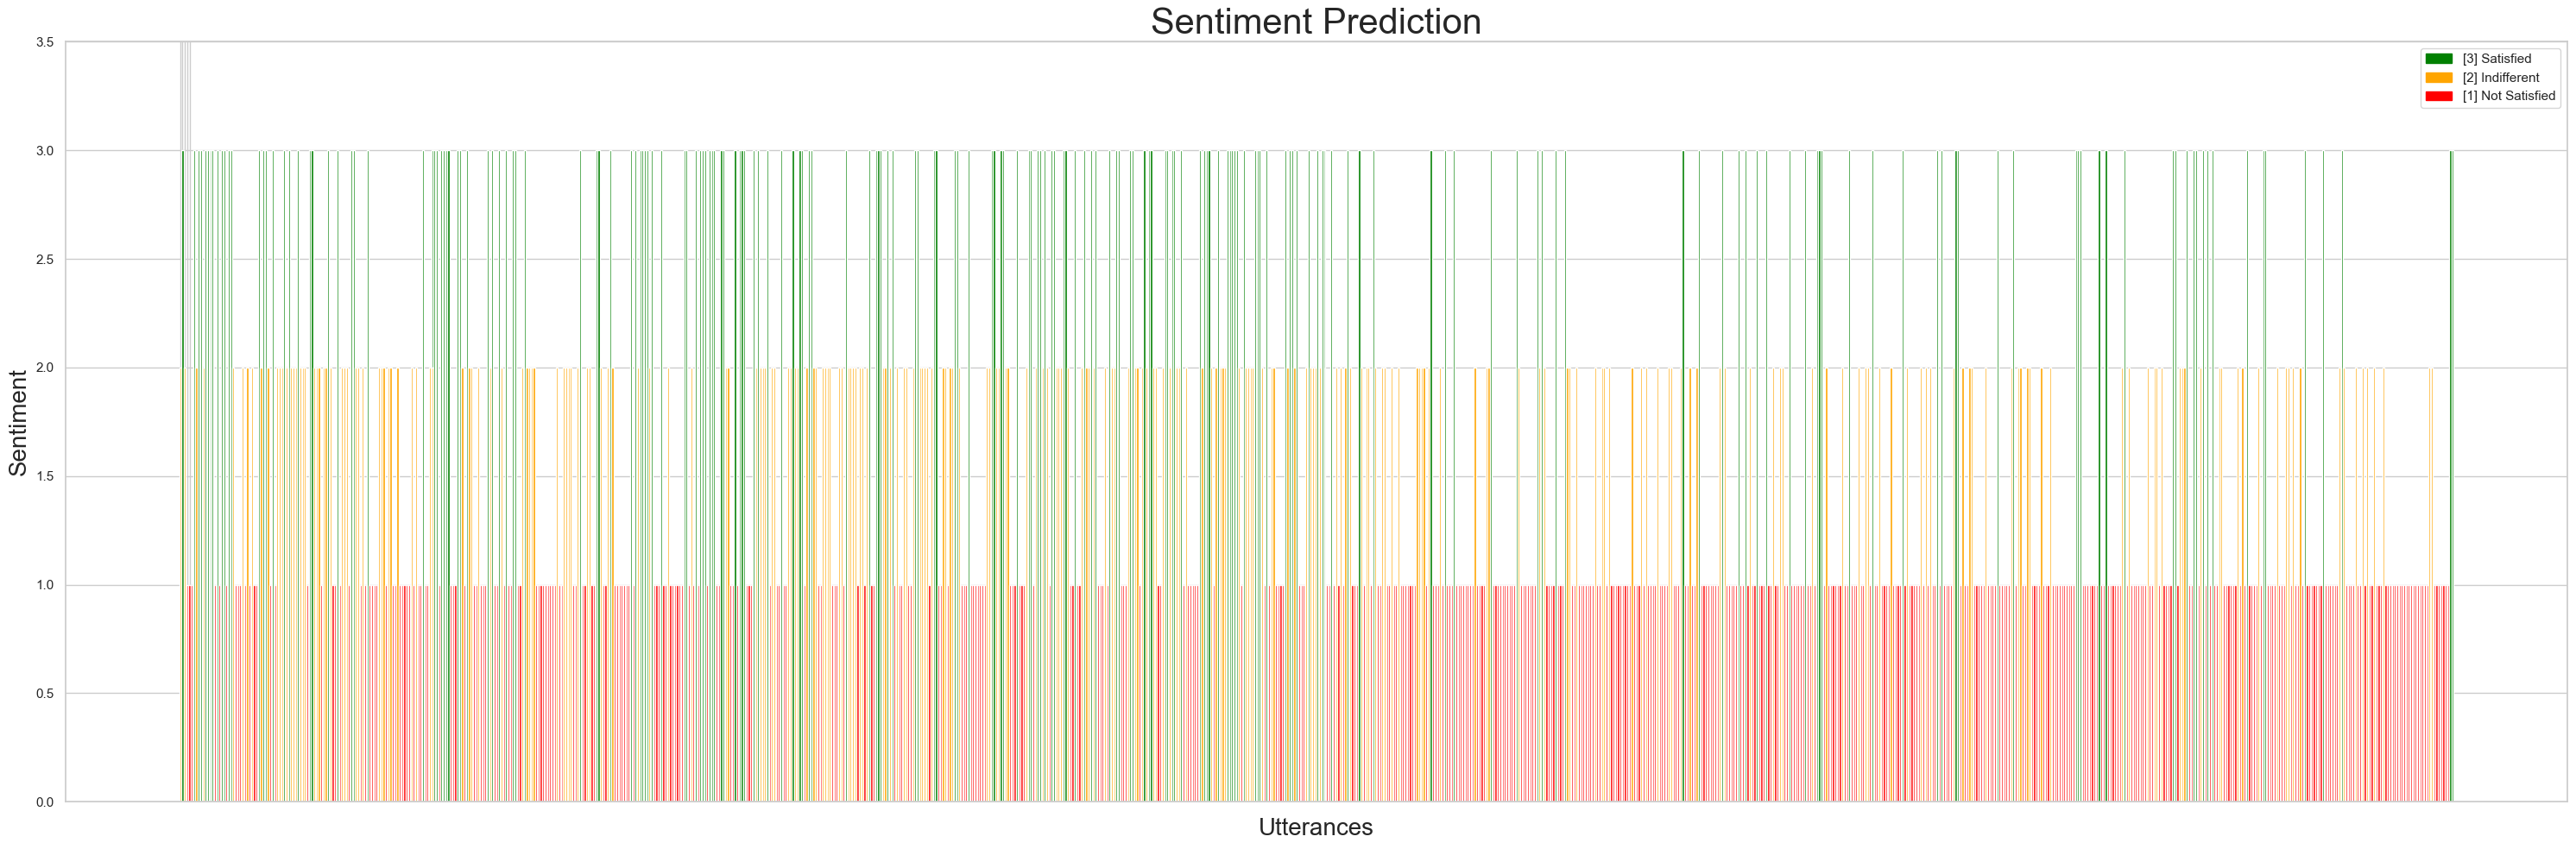

In [13]:
# Create a Bar Graph
plt.figure(figsize=(30, 10))

# Define colors for sentiment numbers
colors = ['green' if number == 3 else 'orange' if number == 2 else 'red' for number in clean_df['sentiment_number']]

# Create the bar graph
bars = plt.bar(limit_df['utterance'], limit_df['sentiment_number'], color=colors)

# Set titles and labels
plt.title('Sentiment Prediction', fontsize = 30)
plt.xlabel('Utterances', fontsize = 20)
plt.ylabel('Sentiment', fontsize = 20)
plt.ylim(0, 3.5)
# plt.xticks(rotation=90)

# X-ticks: Set to '' to remove the display
plt.xticks(ticks=range(len(test_utterances)), labels=[''] * len(test_utterances))

# Add a legend
satisfied_patch = mpatches.Patch(color='green', label='[3] Satisfied')
indifferent_patch = mpatches.Patch(color='orange', label='[2] Indifferent')
not_satisfied_patch = mpatches.Patch(color='red', label='[1] Not Satisfied')
plt.legend(handles=[satisfied_patch, indifferent_patch, not_satisfied_patch], loc='upper left')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display plot
plt.show()

<h3> For new sentences </h3>

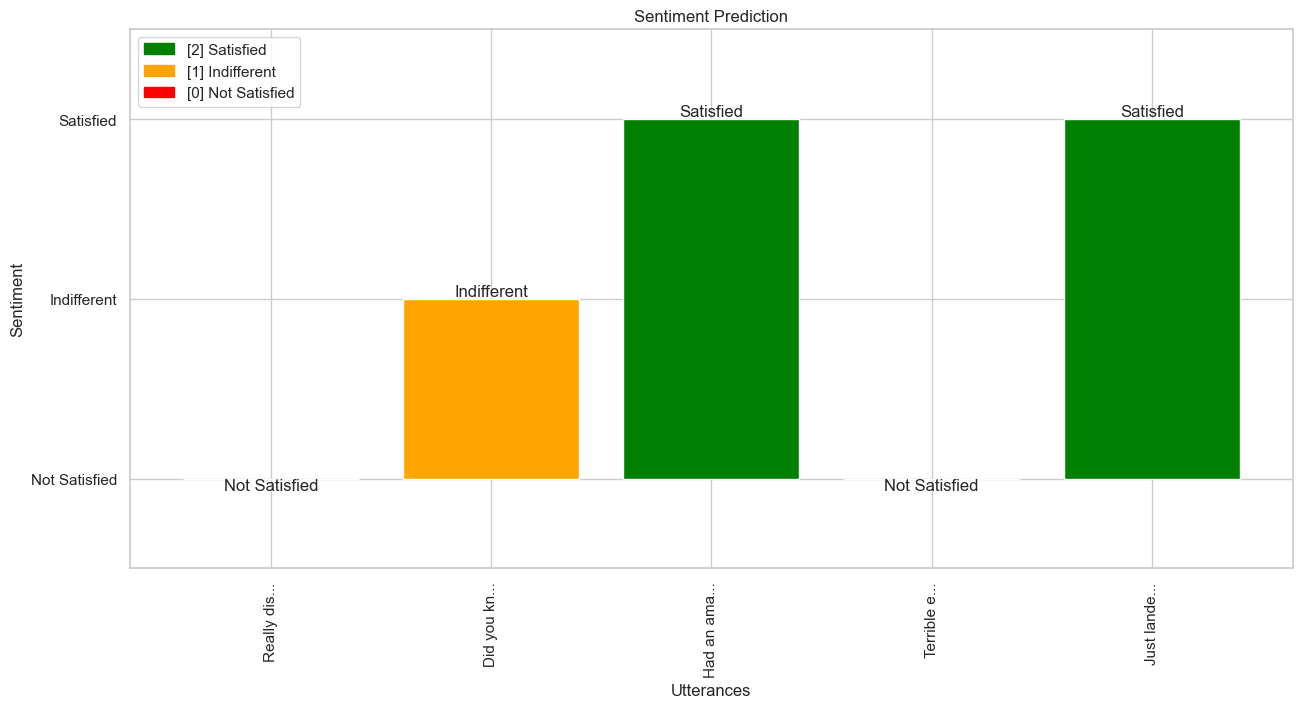

In [18]:
# Create a Bar Graph
plt.figure(figsize = (15, 7))

# Define colors for sentiment numbers
colors = ['green' if pred == 'Satisfied' else 'orange' if pred == 'Indifferent' else 'red' for pred in predictions]

# Create the bar graph
bars = plt.bar(test_utterances, predictions, color=colors)

# Set titles and labels
plt.title('Sentiment Prediction')
plt.xlabel('Utterances')
plt.ylabel('Sentiment')
plt.ylim(-0.5, 2.5)
# plt.xticks(rotation=90)

# Add a legend
satisfied_patch = mpatches.Patch(color='green', label='[2] Satisfied')
indifferent_patch = mpatches.Patch(color='orange', label='[1] Indifferent')
not_satisfied_patch = mpatches.Patch(color='red', label='[0] Not Satisfied')
plt.legend(handles=[satisfied_patch, indifferent_patch, not_satisfied_patch], loc='upper left')

# Truncate x-tick labels to 10 characters
truncated_labels = [label[:10] + '...' if len(label) > 10 else label for label in test_utterances]
plt.xticks(ticks=range(len(truncated_labels)), labels=truncated_labels, rotation=90)

for bar, pred in zip(bars, predictions):
    plt.text(
        # Position the text in the center of the bar
        bar.get_x() + bar.get_width() / 2,  
        # Place the text at the top of the bar
        bar.get_height(),  
        # Display the prediction
        str(pred),  
        # Horizontally align the text to the center
        ha='center',  
        # Vertically align based on sentiment
        va='bottom' if pred in ['Satisfied', 'Indifferent'] else 'top' 
    )

plt.show()